## Homework 5: Importing, Cleaning, and Analyzing Data 

## Exercises:

### 1. Find a dataset of your own choosing and import it as a dataframe using pandas. Clean the data set (i.e., drop missing values, transform non-numeric values using pd.to_numeric, etc…). Print resultant dataframe in the console.

In [1]:
!pip install stats

In [2]:
!pip install pandas_datareader

In [3]:
import numpy
import pandas as pd


from datlib.plots import * 
from datlib import stats
from datlib.FRED import *

In [4]:
data_codes  = {"Consumer Price Index: Food and Beverages": "CPIEBEV",
              "Overall Consumer Price Index": "CPIEALL",
              "U.S. National Home Price Index": "CSUSHPINSA"}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, end = end, freq = "M")

In [5]:
data_codes  = {"U.S. National Home Price Index": "CSUSHPINSA",
               "Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private": "CES0500000030",
               "Trade Balance: Goods and Services, Balance of Payments Basis": "BOPGSTB",}
start = datetime.datetime(2002, 1, 1)
end = datetime.datetime.today()
data = gather_data(data_codes = data_codes, start = start, 
                   end = end, freq = "M")

In [6]:
data.dropna(how="all", axis = 0).dropna(how = "all", axis = 0)

,U.S. National Home Price Index,"Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private","Trade Balance: Goods and Services, Balance of Payments Basis"
DATE,,,
2002-01-31,116.436,497.41,-29678.0
2002-02-28,116.917,499.56,-32501.0
2002-03-31,117.930,502.40,-31161.0
2002-04-30,119.209,503.08,-33965.0
2002-05-31,120.788,504.43,-34026.0
...,...,...,...
2021-05-31,255.507,878.08,-68538.0
2021-06-30,260.987,877.05,-73230.0
2021-07-31,265.308,884.41,-70303.0


In [7]:
nan_value = float("NaN")
data.replace("", nan_value, inplace=True)
data.dropna(subset = ['U.S. National Home Price Index', 
                      'Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private', 
                      'Trade Balance: Goods and Services, Balance of Payments Basis'], inplace=True)

In [8]:
data

,U.S. National Home Price Index,"Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private","Trade Balance: Goods and Services, Balance of Payments Basis"
DATE,,,
2002-01-31,116.436,497.41,-29678.0
2002-02-28,116.917,499.56,-32501.0
2002-03-31,117.930,502.40,-31161.0
2002-04-30,119.209,503.08,-33965.0
2002-05-31,120.788,504.43,-34026.0
...,...,...,...
2021-05-31,255.507,878.08,-68538.0
2021-06-30,260.987,877.05,-73230.0
2021-07-31,265.308,884.41,-70303.0


In [9]:
data = data.rename(columns = {'U.S. National Home Price Index': 'Home Price Index',
                              'Average Weekly Earnings of Production and Nonsupervisory Employees, Total Private': 'Average Weekly Earning',
                             'Trade Balance: Goods and Services, Balance of Payments Basis': 'Trade Balance'}, inplace = False)
data

,Home Price Index,Average Weekly Earning,Trade Balance
DATE,,,
2002-01-31,116.436,497.41,-29678.0
2002-02-28,116.917,499.56,-32501.0
2002-03-31,117.930,502.40,-31161.0
2002-04-30,119.209,503.08,-33965.0
2002-05-31,120.788,504.43,-34026.0
...,...,...,...
2021-05-31,255.507,878.08,-68538.0
2021-06-30,260.987,877.05,-73230.0
2021-07-31,265.308,884.41,-70303.0


### 2. Create a function that builds tables for variance, covariance, and correlation statistics for every variable in a dataframe. Use the function to create tables for a data set that you can use for a project. Save each resultant dataframe as a csv named “dataVariance.csv”, dataCovariance.csv”, and “dataCorrelation.csv”.

In [10]:
stats_dict = {}
cov_dict = {}
corr_dict = {}

In [11]:
for key1, vec1 in data.items():
    stats_dict[key1] = {}
    stats_dict[key1]["mean"] = stats.mean(list(vec1))
    stats_dict[key1]["median"] = stats.median(vec1)
    stats_dict[key1]["variance"] = stats.variance(vec1)
    stats_dict[key1]["standard deviation"] = stats.SD(vec1, sample = True)
    stats_dict[key1]["skewness"] = stats.skewness(vec1, sample = True)
    stats_dict[key1]["kurtosis"] = stats.kurtosis(vec1, sample = True)
    cov_dict[key1] = {}
    corr_dict[key1] = {}
    for key2, vec2 in data.items():
        cov_dict[key1][key2] =stats.covariance(vec1, vec2, sample = True)
        corr_dict[key1][key2] = stats.correlation(vec1, vec2)


In [12]:
variance_df = pd.DataFrame(stats_dict).sort_index(axis = 0).sort_index(axis = 1)
cov_df = pd.DataFrame(cov_dict).sort_index(axis = 0).sort_index(axis = 1)
corr_df = pd.DataFrame(corr_dict).sort_index(axis = 0).sort_index(axis = 1)

In [13]:
variance_df

,Average Weekly Earning,Home Price Index,Trade Balance
kurtosis,540.807850,823.044582,6.135336e+02
mean,659.414262,170.538072,-4.767277e+04
median,659.170000,167.023000,-4.435700e+04
skewness,0.052498,0.142520,-1.307953e-01
standard deviation,101.812592,31.222984,1.061815e+04
variance,10322.066335,970.761321,1.122695e+08


In [14]:
cov_df

,Average Weekly Earning,Home Price Index,Trade Balance
Average Weekly Earning,10365.803904,2484.702771,-1.456070e+05
Home Price Index,2484.702771,974.874716,-1.933510e+05
Trade Balance,-145607.009153,-193351.040233,1.127452e+08


In [15]:
corr_df

,Average Weekly Earning,Home Price Index,Trade Balance
Average Weekly Earning,1.000000,0.781625,-0.134689
Home Price Index,0.781625,1.000000,-0.583207
Trade Balance,-0.134689,-0.583207,1.000000


In [16]:
variance_df.to_csv("Datastats.csv")
cov_df.to_csv("DataCovMatrix.csv")
corr_df.to_csv("DataCorrMatrix.csv")
data.to_csv("Homework55Data.csv")

### 3.In chapter 6 you created a series of scatter plots that integrate a 3rd variable by adjusting the color according to the value of that variable. Each of these plots is saved in a PDF. Create a function that performs these operations on all variables in a dataframe. (You may want to pass to the function a dataframe that selects from a limited number of keys in your dataset.) Be sure to pass at least two other objects to this function (e.g., fontsize, figsize, etc..). In creating this function, remove any redundancies where the two plots share the same x and y variables (i.e., if key1 is on the horizontal axis and key2 on the vertical axis with key3 being represented by color, remove any graph where key 3 remains the same but key1 and key2 are switched.) Use this function to visualize the dataset that you chose for question #1.

Home Price Index Average Weekly Earning Trade Balance


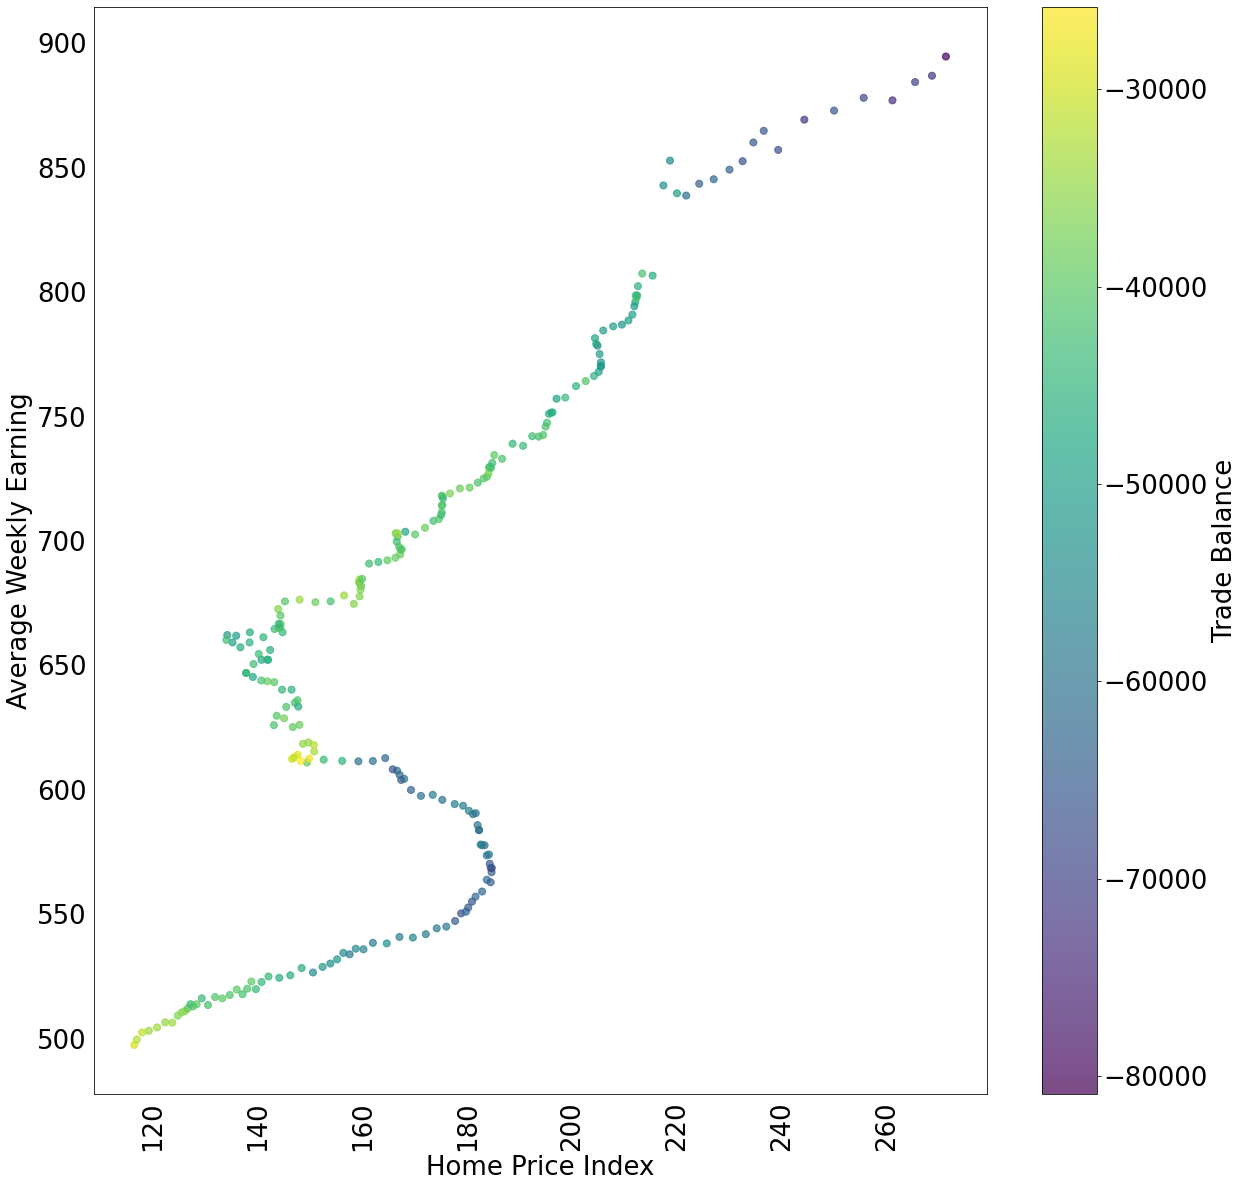

Home Price Index Trade Balance Average Weekly Earning


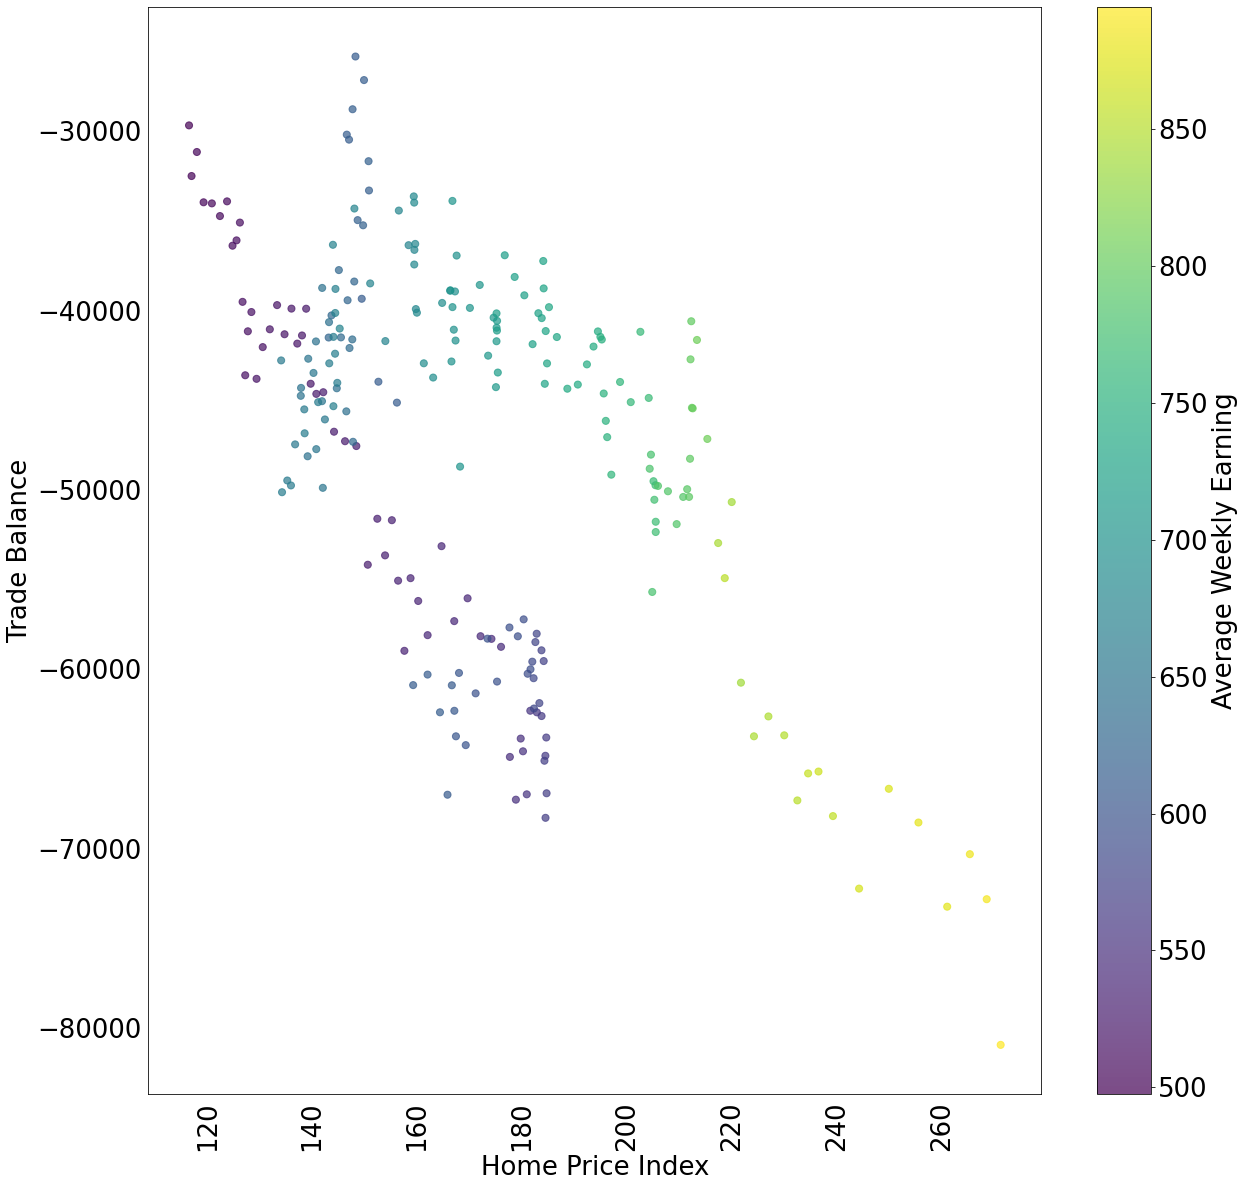

Average Weekly Earning Home Price Index Trade Balance


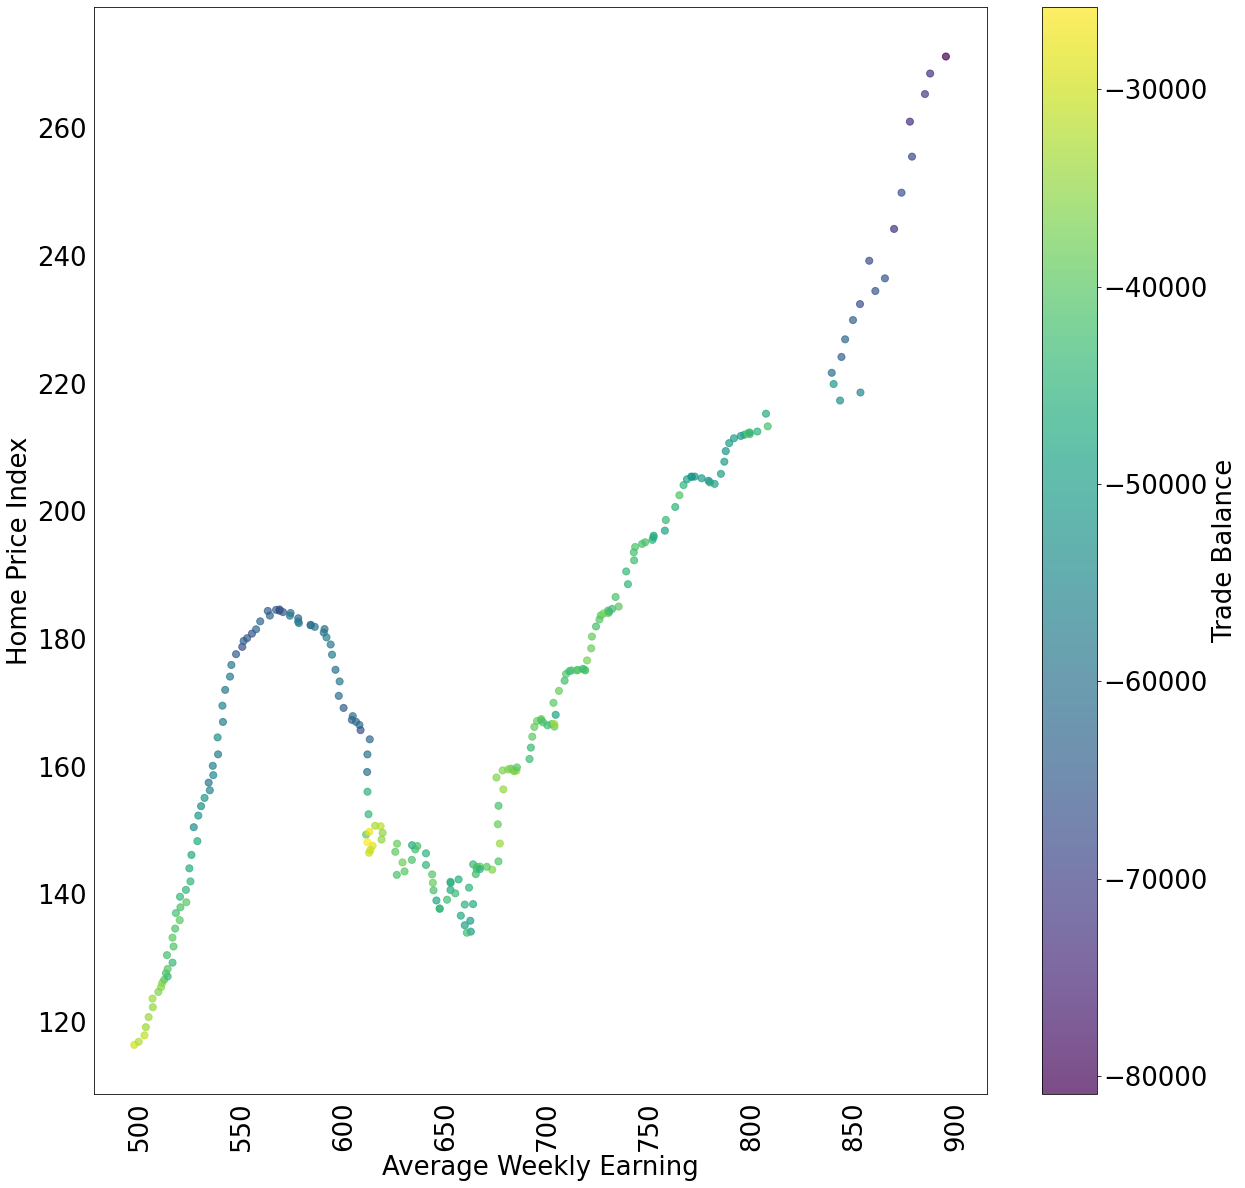

Average Weekly Earning Trade Balance Home Price Index


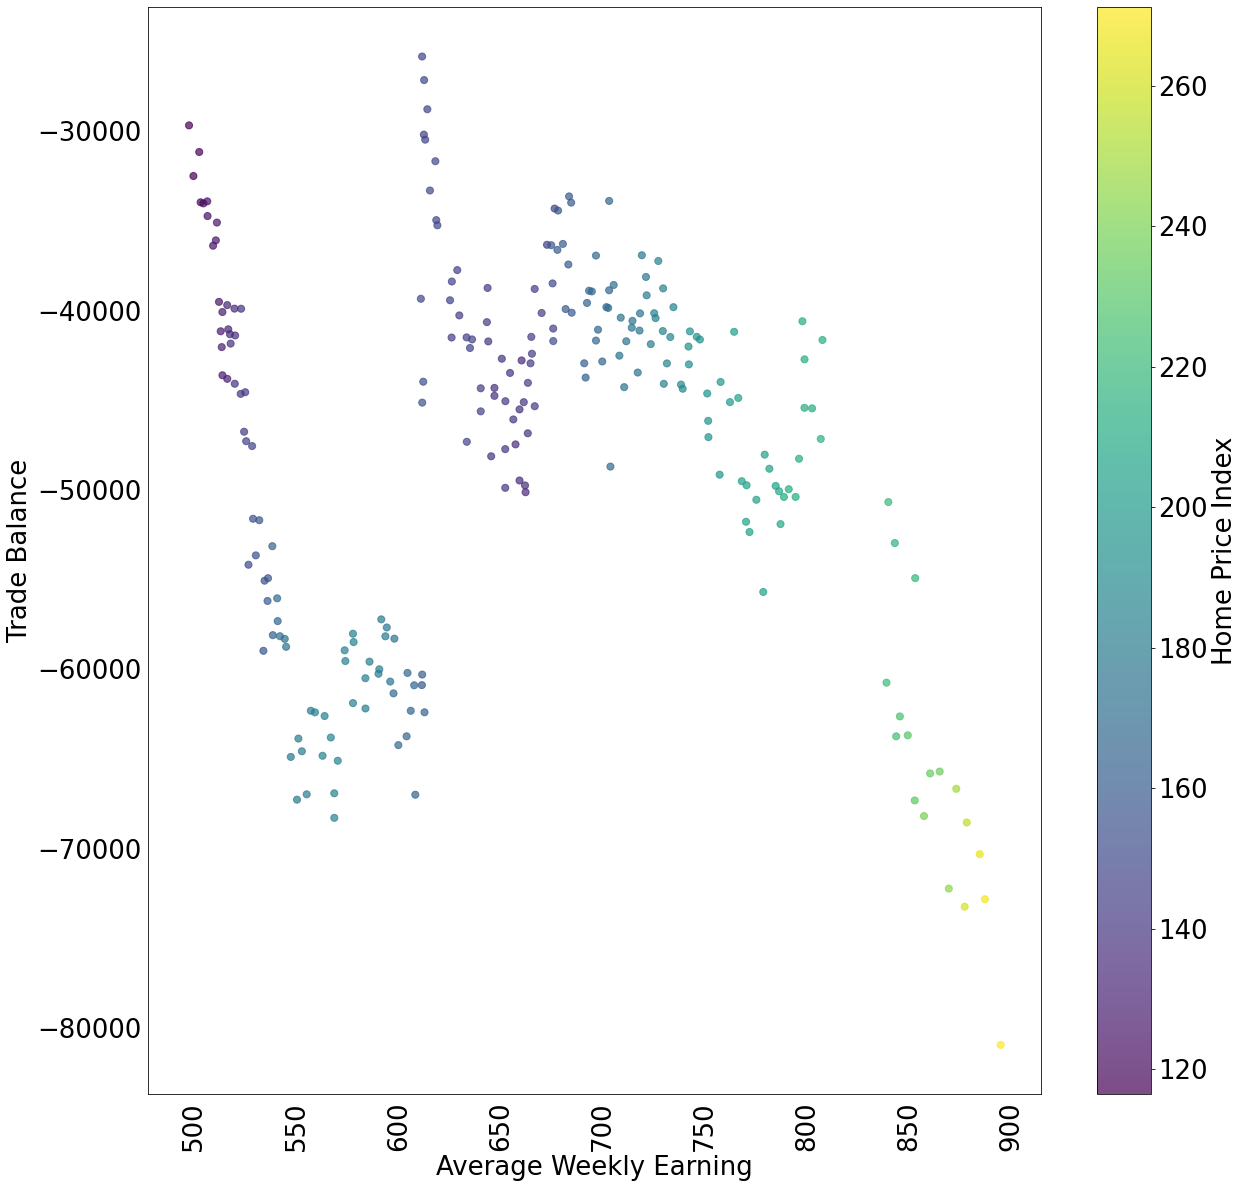

Trade Balance Home Price Index Average Weekly Earning


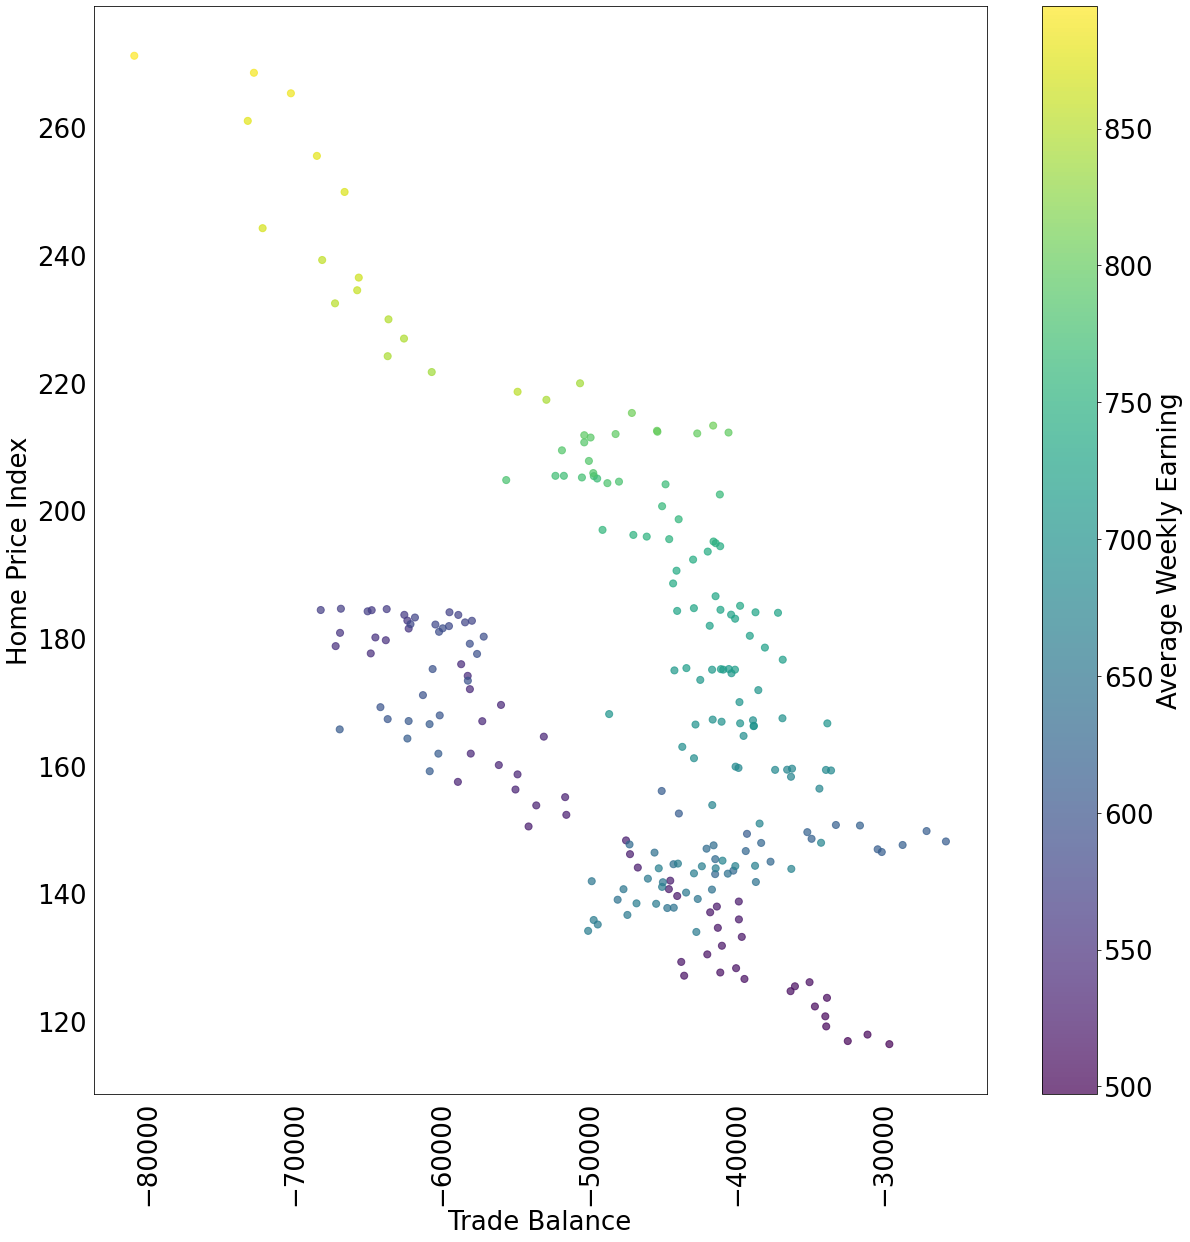

Trade Balance Average Weekly Earning Home Price Index


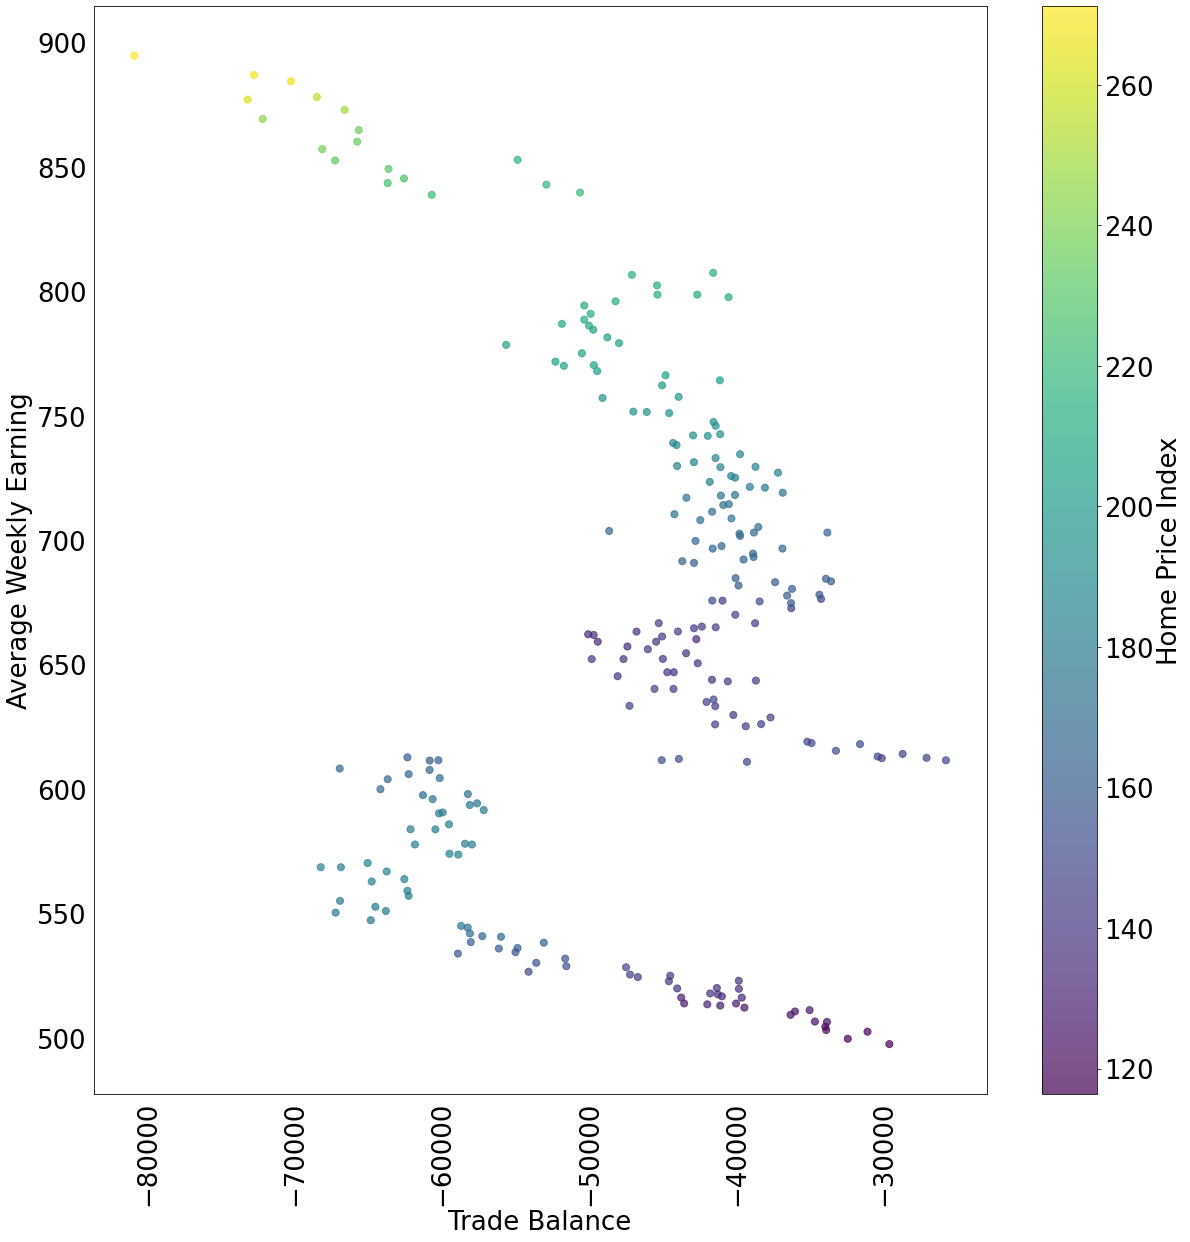

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

def color_dim_scatter(data, pp):  
    for key1 in data:  
        for key2 in data:  
            for key3 in data:  
                if key1 != key2 and key1 != key3 and key2 != key3:  
                    print(key1,key2,key3)
                    fig, ax = plt.subplots(figsize = (20, 20))  
                    data.plot.scatter(x = key1, y = key2, c = key3, s = 50,  
                                      alpha = .7, colormap = "viridis",  
                                      ax = ax)  
                    plt.xticks(rotation = 90)  
                    plt.setp(ax.get_xticklines(), visible = False)  
                    plt.setp(ax.get_yticklines(), visible = False)  
                    plt.show()  
                    pp.savefig(fig, bbox_inches = "tight")  
                    plt.close()  
pp = PdfPages("Homework 5 Plots.pdf")
plt.rcParams.update({"font.size" : 26})
color_dim_scatter(data, pp)

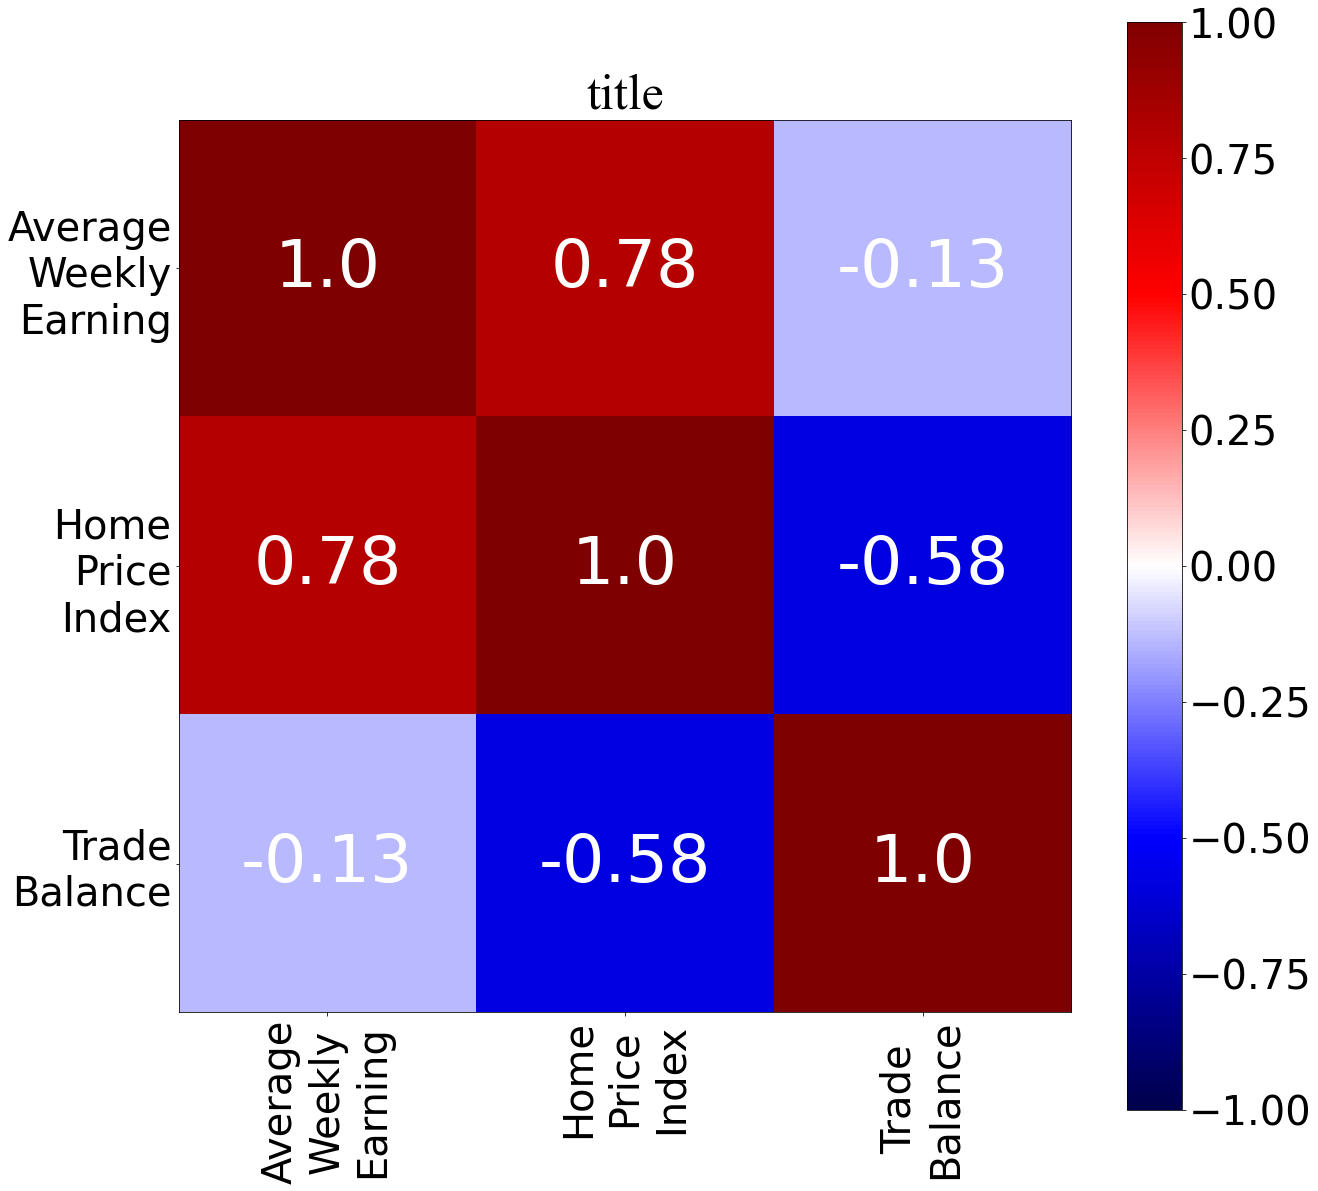

In [18]:
import numpy as np
def corr_matrix_heatmap(data, pp=None, title = "Correlation"):  
    fig, ax = plt.subplots(figsize=(20,20))  
    im = ax.imshow(data, 
                   norm = plt.cm.colors.Normalize(-1,1), 
                   cmap = "seismic")  
    labels = data.keys()  
    num_vars = len(labels)  
    tick_labels = [lab.replace(" ", "\n") for lab in labels]  
    tick_font_size = 120 / num_vars  
    val_font_size = 200 / num_vars  
    plt.rcParams.update({'font.size': tick_font_size}) 
    x_ticks = np.arange(num_vars)  
    plt.xticks(x_ticks, 
               tick_labels, 
               fontsize = tick_font_size, 
               rotation = 90)  
    y_ticks = np.arange(len(labels))  
    plt.yticks(y_ticks, 
               tick_labels, 
               fontsize = tick_font_size)  
    for i in range(len(labels)):  
        for j in range(len(labels)):  
            text = ax.text(i, j, 
                           str(round(data.values[i][j],2)),  
                           fontsize= val_font_size, 
                           ha="center",   
                           va="center", 
                           color = "w")  
    title_font = {"fontname":"Times New Roman"}  
    plt.title("title", fontsize = 50, **title_font)  
    cbar = fig.colorbar(im)
    plt.show()
    if pp != None:
        pp.savefig(fig, bbox_inches="tight")
    plt.close()
corr_data = pd.read_csv("DataCorrMatrix.csv", index_col = [0])
corr_matrix_heatmap(corr_data, pp)